# Nike and Adidas Original Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

nike = pd.read_csv('../data/nike_sales.csv')
# puma = pd.read_csv('../data/puma_sales.csv')
adidas = pd.read_csv('../data/adidas_sales.csv')

nike.head()

,Brand,Retailer ID,Invoice Date,Region,State,City,Units Sold,Operating Profit,Operating Margin,Sales Method,Product Name,Product ID
0,NIKE,1185732,01/01/2020,Northeast,New York,New York,"1,200","$300,000",50%,In-store,Nike Air Force 1 '07 Essential,CJ1646-600
1,NIKE,1185732,02/01/2020,Northeast,New York,New York,"1,000","$150,000",30%,In-store,Nike Air Force 1 '07,CT4328-101
2,NIKE,1185732,03/01/2020,Northeast,New York,New York,"1,000","$140,000",35%,In-store,Nike Air Force 1 Sage Low LX,CI3482-200
3,NIKE,1185732,04/01/2020,Northeast,New York,New York,850,"$133,875",35%,In-store,Nike Air Max Dia SE,CD0479-200
4,NIKE,1185732,05/01/2020,Northeast,New York,New York,900,"$162,000",30%,In-store,Nike Air Max Verona,CZ6156-101


In [2]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [3]:
adidas.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [4]:
nike.isna().sum()

Brand               0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Units Sold          0
Operating Profit    0
Operating Margin    0
Sales Method        0
Product Name        0
Product ID          0
dtype: int64

- No missing values in both data sets
- Drop columns that are not needed/do not match.
- No duplicates were found

In [5]:
# duplicates = nike.duplicated()
# dup = nike[~duplicates].reset_index()
# dup

In [6]:
# puma = puma.drop(columns=['Total Sales','Price per Unit','Sales Method','Retailer','Product'])
# puma.columns

In [7]:
adidas_dropped = adidas.drop(columns=['Sales Method','Retailer','Total Sales','Price per Unit','Product'])
adidas.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [8]:
nike_dropped = nike.drop(columns=['Product Name','Brand','Sales Method','Product ID'])
nike.columns

Index(['Brand', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Units Sold', 'Operating Profit', 'Operating Margin', 'Sales Method',
       'Product Name', 'Product ID'],
      dtype='object')

Remove periods, dollar signs, etc. and convert columns to the correct type

In [9]:
# remove [$ . ,] from columns
adidas_dropped[['Units Sold','Operating Profit','Operating Margin']] = adidas_dropped[['Units Sold','Operating Profit','Operating Margin']].replace('[$,.%]','',regex=True)

# convert columns, either to datetime or int
adidas_dropped[['Units Sold','Operating Profit','Operating Margin']] = adidas_dropped[['Units Sold','Operating Profit','Operating Margin']].astype('int')
adidas_dropped['Invoice Date'] = adidas_dropped['Invoice Date'].astype('datetime64[ns]')
adidas_dropped['Operating Margin'] = adidas_dropped['Operating Margin'] / 100

# remove [$ . ,] from columns
nike_dropped[['Units Sold','Operating Profit','Operating Margin']] = nike_dropped[['Units Sold','Operating Profit','Operating Margin']].replace('[$,.%]','',regex=True)

# convert columns, either to datetime or int
nike_dropped[['Units Sold','Operating Profit','Operating Margin']] = nike_dropped[['Units Sold','Operating Profit','Operating Margin']].astype('int')
nike_dropped['Invoice Date'] = nike_dropped['Invoice Date'].astype('datetime64[ns]')
nike_dropped['Operating Margin'] = nike_dropped['Operating Margin'] / 100

# remove [$ . ,] from columns
# puma[['Units Sold','Operating Profit','Operating Margin']] = puma[['Units Sold','Operating Profit','Operating Margin']].replace('[$,.%]','',regex=True)

# convert columns, either to datetime or int
# puma[['Units Sold','Operating Profit','Operating Margin']] = puma[['Units Sold','Operating Profit','Operating Margin']].astype('int')
# puma['Invoice Date'] = puma['Invoice Date'].astype('datetime64[ns]')
# puma['Operating Margin'] = puma['Operating Margin'] / 100


Collapse the dates into months

In [10]:
nike_dropped['Invoice Date'] = pd.to_datetime(nike_dropped['Invoice Date'])
nike_dropped['YearMonth'] = nike_dropped['Invoice Date'].dt.to_period('M')

adidas_dropped['Invoice Date'] = pd.to_datetime(adidas_dropped['Invoice Date'])
adidas_dropped['YearMonth'] = adidas_dropped['Invoice Date'].dt.to_period('M')

# puma['Invoice Date'] = pd.to_datetime(puma['Invoice Date'])
# puma['YearMonth'] = puma['Invoice Date'].dt.to_period('M')


- drop `Retailer ID`, `Invoice Date`, `Region`, `State`, `City`
- group by YearMonth and aggregate `Units Sold`, `Operating Profit`, `Operating Margin`

In [11]:
nike_dropped['Units Sold Sum'] = nike_dropped.groupby('YearMonth')['Units Sold'].transform('sum')
nike_dropped['Operating Profit Sum'] = nike_dropped.groupby('YearMonth')['Operating Profit'].transform('sum')
nike_dropped['Operating Margin Sum'] = nike_dropped.groupby('YearMonth')['Operating Margin'].transform('sum')
nike_dropped['Operating Margin Median'] = nike_dropped.groupby('YearMonth')['Operating Margin'].transform('median')

nike_dropped = nike_dropped.drop(columns =['Retailer ID','Invoice Date','Region','State','City','Units Sold','Operating Profit','Operating Margin'])
# nike

adidas_dropped['Units Sold Sum'] = adidas_dropped.groupby('YearMonth')['Units Sold'].transform('sum')
adidas_dropped['Operating Profit Sum'] = adidas_dropped.groupby('YearMonth')['Operating Profit'].transform('sum')
adidas_dropped['Operating Margin Sum'] = adidas_dropped.groupby('YearMonth')['Operating Margin'].transform('sum')
adidas_dropped['Operating Margin Median'] = adidas_dropped.groupby('YearMonth')['Operating Margin'].transform('median')

adidas_dropped = adidas_dropped.drop(columns =['Retailer ID','Invoice Date','Region','State','City','Units Sold','Operating Profit','Operating Margin'])
# adidas

# puma['Units Sold Sum'] = puma.groupby('YearMonth')['Units Sold'].transform('sum')
# puma['Operating Profit Sum'] = puma.groupby('YearMonth')['Operating Profit'].transform('sum')
# puma['Operating Margin Sum'] = puma.groupby('YearMonth')['Operating Margin'].transform('sum')
# puma['Operating Margin Median'] = puma.groupby('YearMonth')['Operating Margin'].transform('median')

# puma = puma.drop(columns =['Retailer ID','Invoice Date','Region','State','City','Units Sold','Operating Profit','Operating Margin'])
# puma

In [12]:
nike_combined = nike_dropped.groupby('YearMonth').agg({
    'Units Sold Sum': 'sum',
    'Operating Profit Sum': 'sum',
    'Operating Margin Sum': 'sum',
    'Operating Margin Median': 'median'
}).reset_index()
# nike_combined

adidas_combined = adidas_dropped.groupby('YearMonth').agg({
    'Units Sold Sum': 'sum',
    'Operating Profit Sum': 'sum',
    'Operating Margin Sum': 'sum',
    'Operating Margin Median': 'median'
}).reset_index()
# adidas_combined

# puma_combined = puma.groupby('YearMonth').agg({
#     'Units Sold Sum': 'sum',
#     'Operating Profit Sum': 'sum',
#     'Operating Margin Sum': 'sum',
#     'Operating Margin Median': 'median'
# }).reset_index()
# puma_combined

In [13]:
# puma_combined.head()

In [14]:
adidas_combined.head()

,YearMonth,Units Sold Sum,Operating Profit Sum,Operating Margin Sum,Operating Margin Median
0,2020-01,7249950,874501350,9370.50,0.40
1,2020-02,4314444,593639154,5257.68,0.40
2,2020-03,6153332,767923179,6563.10,0.36
3,2020-04,7112170,1209169260,7365.80,0.43
4,2020-05,3391975,557730560,3602.40,0.40


In [15]:
nike_combined.head()

,YearMonth,Units Sold Sum,Operating Profit Sum,Operating Margin Sum,Operating Margin Median
0,2020-01,5886713,749755181,7244.51,0.40
1,2020-02,2515786,321692007,3098.55,0.37
2,2020-03,4256517,534239004,4812.96,0.37
3,2020-04,10055864,1642525984,9908.88,0.42
4,2020-05,3206976,500511072,3718.08,0.40


In [16]:
nike_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   YearMonth                24 non-null     period[M]
 1   Units Sold Sum           24 non-null     int64    
 2   Operating Profit Sum     24 non-null     int64    
 3   Operating Margin Sum     24 non-null     float64  
 4   Operating Margin Median  24 non-null     float64  
dtypes: float64(2), int64(2), period[M](1)
memory usage: 1.1 KB


In [17]:
nike_combined['YearMonth'] = pd.to_datetime(nike_combined['YearMonth'].astype(str),format='%Y-%m')

adidas_combined['YearMonth'] = pd.to_datetime(adidas_combined['YearMonth'].astype(str),format='%Y-%m')

nike_2021 = nike_combined[(nike_combined['YearMonth'] >= '2021-01')&(nike_combined['YearMonth'] <= '2021-12')]
nike_2020 = nike_combined[(nike_combined['YearMonth'] >= '2020-01')&(nike_combined['YearMonth'] <= '2020-12')]

adidas_2021 = adidas_combined[(adidas_combined['YearMonth'] >= '2021-01')&(adidas_combined['YearMonth'] <= '2021-12')]
adidas_2020 = adidas_combined[(adidas_combined['YearMonth'] >= '2020-01')&(adidas_combined['YearMonth'] <= '2020-12')]

nike_2021

,YearMonth,Units Sold Sum,Operating Profit Sum,Operating Margin Sum,Operating Margin Median
12,2021-01-01,62103890,6721445465,106216.65,0.40
13,2021-02-01,65764762,7885361190,113949.64,0.41
14,2021-03-01,86097110,9876323910,172745.40,0.41
15,2021-04-01,103905189,12945194346,187953.39,0.42
16,2021-05-01,131190960,17863268430,216564.20,0.42
17,2021-06-01,137262873,19364465670,246409.35,0.42
18,2021-07-01,84874880,13135882920,143561.60,0.41
19,2021-08-01,123942530,17308913595,201739.35,0.42
20,2021-09-01,145308960,20175993056,245873.92,0.42
21,2021-10-01,220495518,28819315595,410095.62,0.40


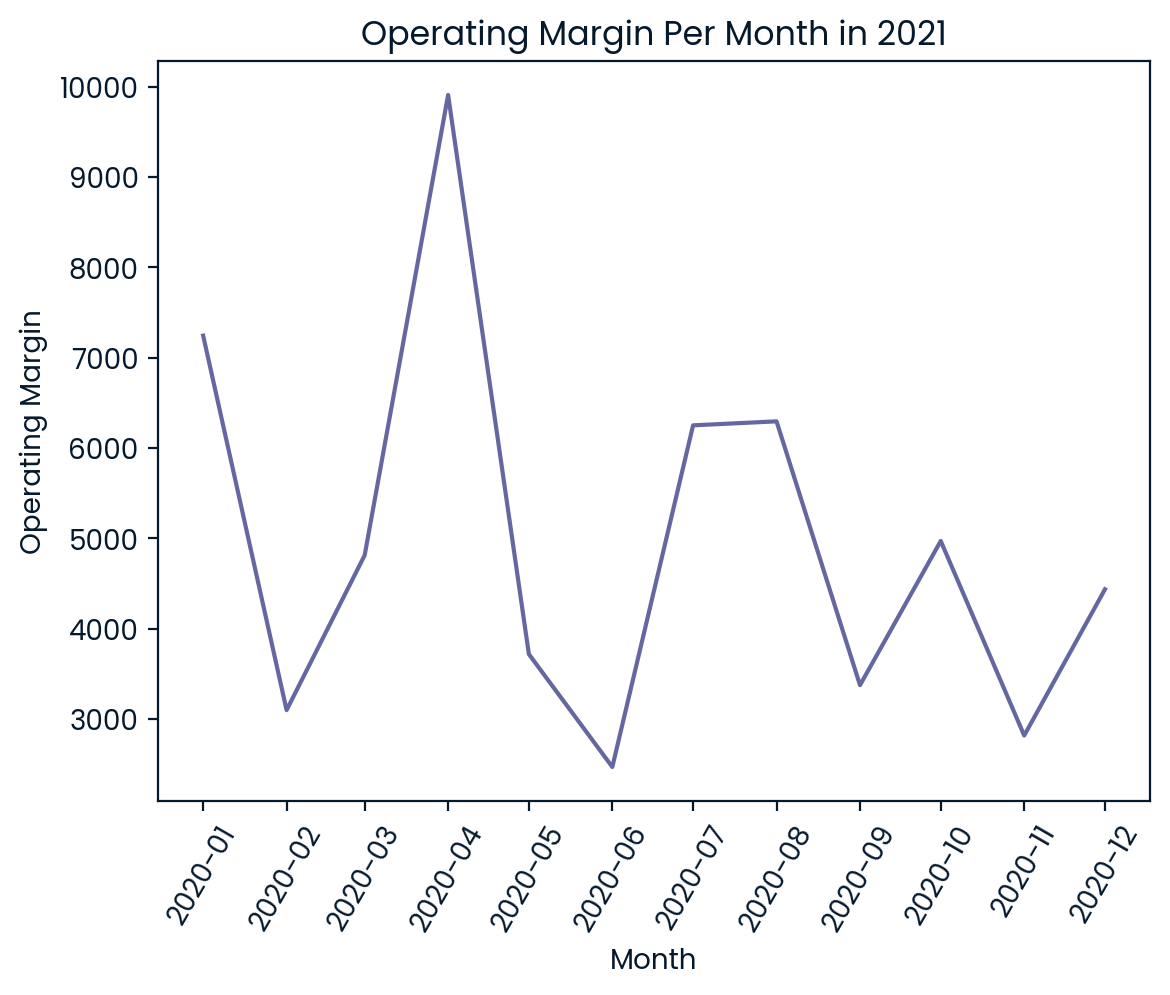

In [18]:
# Convert YearMonth from period[M] to DateTime64[ns]
# nike_combined['YearMonth'] = pd.to_datetime(nike_combined['YearMonth'].astype(str),format='%Y-%m')

# adidas_combined['YearMonth'] = pd.to_datetime(adidas_combined['YearMonth'].astype(str),format='%Y-%m')
import matplotlib.dates as mdates

sns.lineplot(data=nike_2020,x='YearMonth',y='Operating Margin Sum')
plt.xticks(rotation = 60)
plt.xlabel('Month')
plt.ylabel('Operating Margin')
plt.title('Operating Margin Per Month in 2021')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

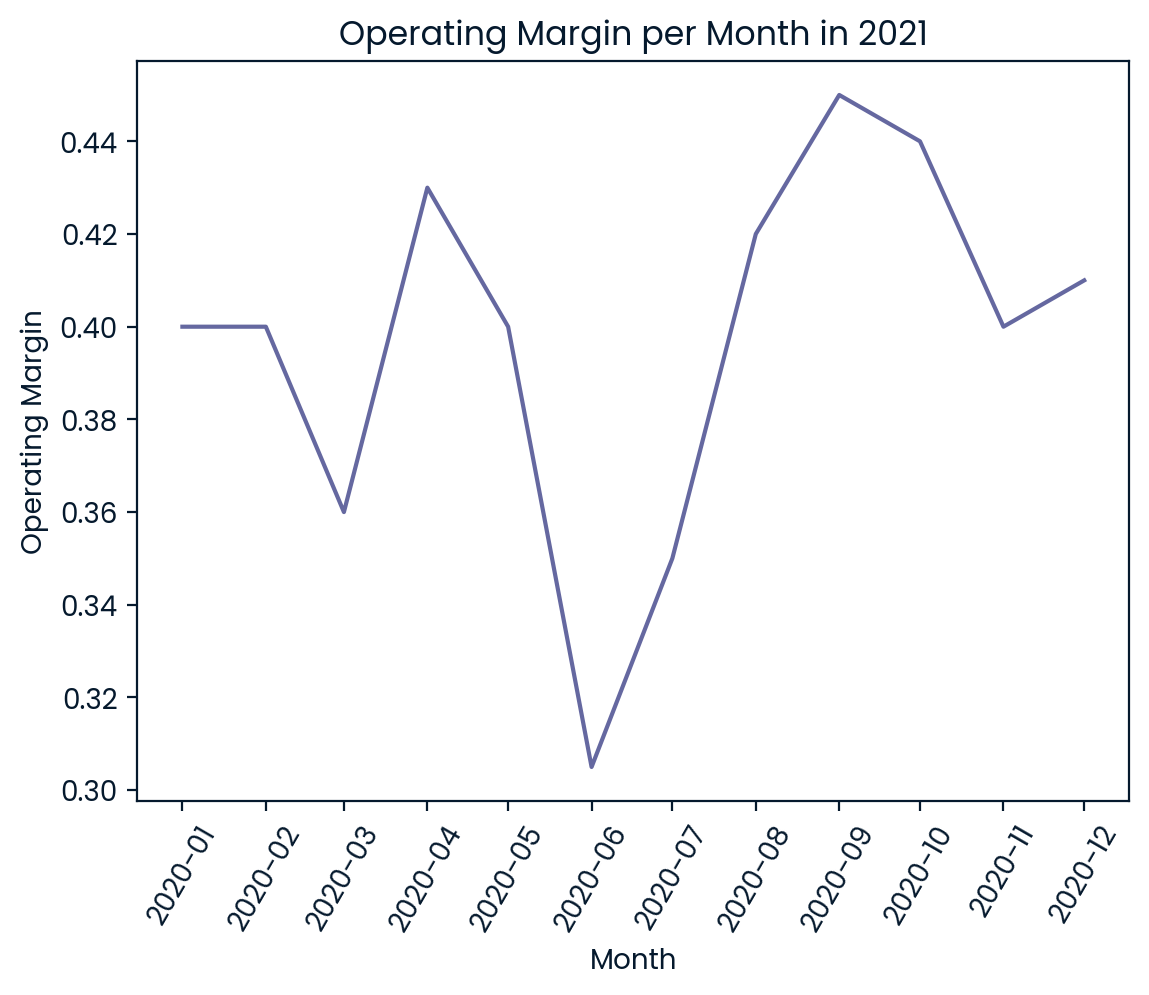

In [19]:
sns.lineplot(data=adidas_2020,x='YearMonth',y='Operating Margin Median')
plt.xticks(rotation = 60)
plt.xlabel('Month')
plt.ylabel('Operating Margin')
plt.title('Operating Margin per Month in 2021')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

Operating margin is the operating income over revenue. This is an important as it calculates how much profit a company makes after deducting costs for produtction.

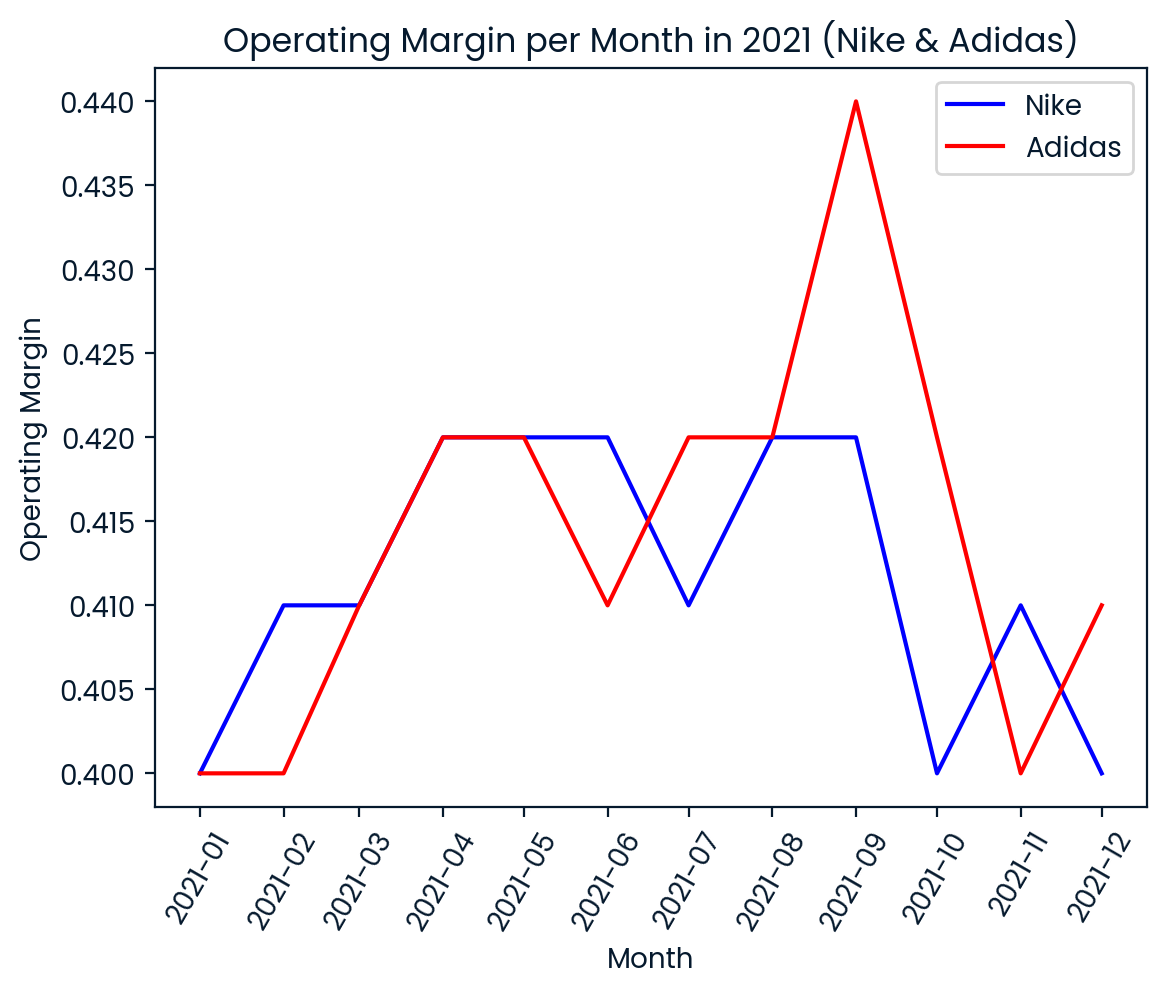

In [20]:
plt.plot(nike_2021['YearMonth'], nike_2021['Operating Margin Median'], label='Nike', color='blue')
plt.plot(adidas_2021['YearMonth'], adidas_2021['Operating Margin Median'], label='Adidas', color='red')

plt.xlabel('Month')
plt.ylabel('Operating Margin')
plt.title('Operating Margin per Month in 2021 (Nike & Adidas)')
plt.legend()
plt.xticks(rotation = 60)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.grid(True)
plt.show()

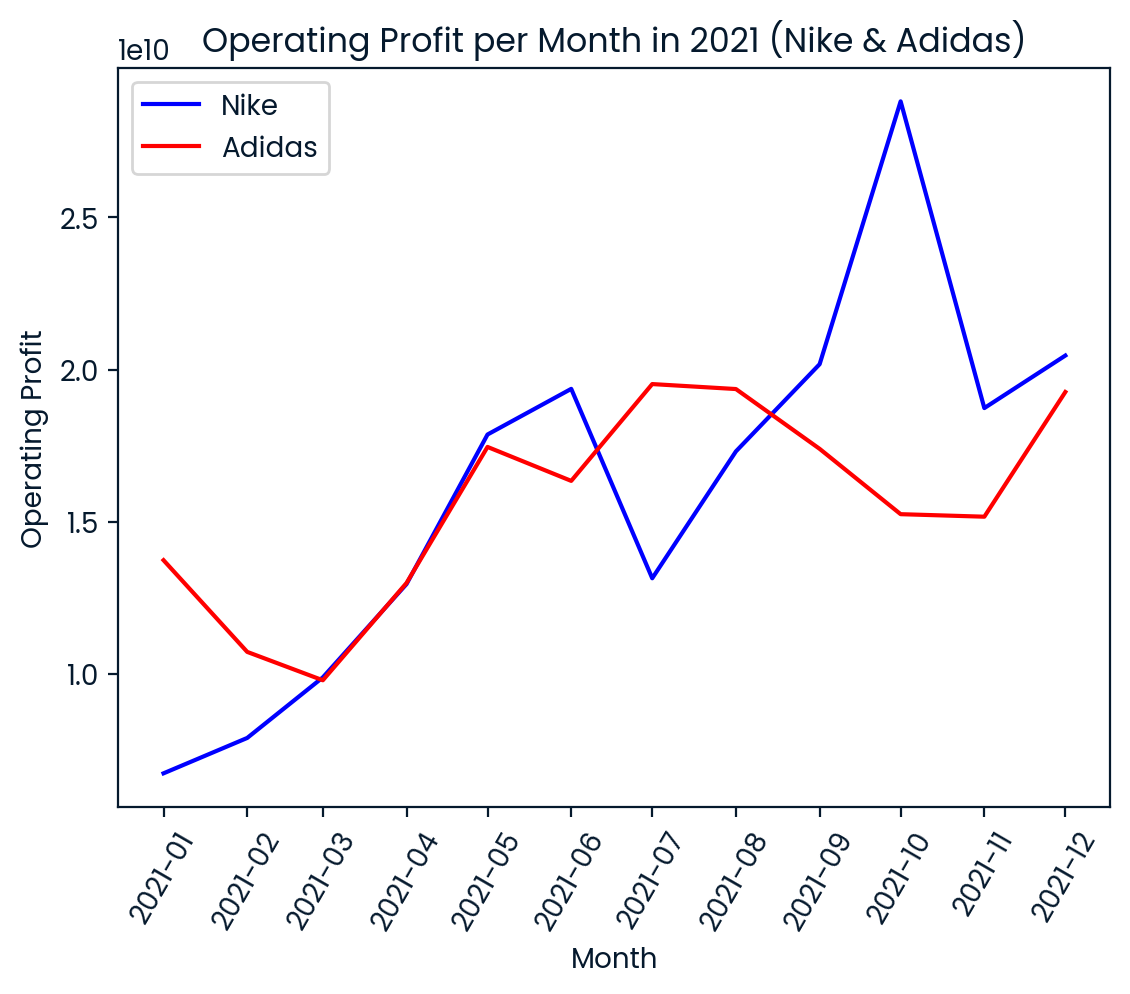

In [21]:
import matplotlib.ticker as mtick

plt.plot(nike_2021['YearMonth'], nike_2021['Operating Profit Sum'], label='Nike', color='blue')
plt.plot(adidas_2021['YearMonth'], adidas_2021['Operating Profit Sum'], label='Adidas', color='red')

plt.xlabel('Month')
plt.ylabel('Operating Profit')
plt.title('Operating Profit per Month in 2021 (Nike & Adidas)')
plt.legend()
plt.xticks(rotation = 60)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Format y-axis numbers as thousand or million abbreviations
# plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M' if x >= 1e6 else f'{x*1e-3:.1f}K'))
# plt.grid(True)
plt.show()

In [22]:
adidas[['Units Sold','Operating Profit','Operating Margin']] = adidas[['Units Sold','Operating Profit','Operating Margin']].replace('[$,.%]','',regex=True)

# convert columns, either to datetime or int
adidas[['Units Sold','Operating Profit','Operating Margin']] = adidas[['Units Sold','Operating Profit','Operating Margin']].astype('int')
adidas['Invoice Date'] = adidas['Invoice Date'].astype('datetime64[ns]')
adidas['Operating Margin'] = adidas['Operating Margin'] /100

# remove [$ . ,] from columns
nike[['Units Sold','Operating Profit','Operating Margin']] = nike[['Units Sold','Operating Profit','Operating Margin']].replace('[$,.%]','',regex=True)

# convert columns, either to datetime or int
nike[['Units Sold','Operating Profit','Operating Margin']] = nike[['Units Sold','Operating Profit','Operating Margin']].astype('int')
nike['Invoice Date'] = nike['Invoice Date'].astype('datetime64[ns]')
nike['Operating Margin'] = nike['Operating Margin'] / 100

In [31]:
nike_combined.to_csv('../nike_individual.csv')
adidas_combined.to_csv('../adidas_individual.csv')

In [23]:
nike

,Brand,Retailer ID,Invoice Date,Region,State,City,Units Sold,Operating Profit,Operating Margin,Sales Method,Product Name,Product ID
0,NIKE,1185732,2020-01-01,Northeast,New York,New York,1200,300000,0.50,In-store,Nike Air Force 1 '07 Essential,CJ1646-600
1,NIKE,1185732,2020-02-01,Northeast,New York,New York,1000,150000,0.30,In-store,Nike Air Force 1 '07,CT4328-101
2,NIKE,1185732,2020-03-01,Northeast,New York,New York,1000,140000,0.35,In-store,Nike Air Force 1 Sage Low LX,CI3482-200
3,NIKE,1185732,2020-04-01,Northeast,New York,New York,850,133875,0.35,In-store,Nike Air Max Dia SE,CD0479-200
4,NIKE,1185732,2020-05-01,Northeast,New York,New York,900,162000,0.30,In-store,Nike Air Max Verona,CZ6156-101
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,NIKE,1185732,2021-01-24,Northeast,New Hampshire,Manchester,64,896,0.28,Outlet,Nike Air Max 98,AH6799-300
9644,NIKE,1185732,2021-01-24,Northeast,New Hampshire,Manchester,105,1378,0.32,Outlet,Nike P-6000 SE,CJ9585-600
9645,NIKE,1185732,2021-02-22,Northeast,New Hampshire,Manchester,184,2791,0.37,Outlet,Nike Air Force 1 '07 Essential,CJ1646-600
9646,NIKE,1185732,2021-02-22,Northeast,New Hampshire,Manchester,70,1235,0.42,Outlet,Nike Air Force 1 '07,CT4328-101


In [24]:
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$600,000",300000,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$500,000",150000,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$400,000",140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500",133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000",162000,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",896,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305",1378,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544",2791,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940",1235,0.42,Outlet


In [25]:
# Group by each day in the month for adidas and nike datasets
adidas_daily = adidas.groupby(adidas['Invoice Date'].dt.to_period('D')).agg({
    'Units Sold': 'sum',
    'Operating Profit': 'sum',
    'Operating Margin': 'median'
})

nike_daily = nike.groupby(nike['Invoice Date'].dt.to_period('D')).agg({
    'Units Sold': 'sum',
    'Operating Profit': 'sum',
    'Operating Margin': 'median'
})

# Reset index to have 'Invoice Date' as a column again
adidas_daily = adidas_daily.reset_index()
nike_daily = nike_daily.reset_index()

adidas_daily
nike_daily

,Invoice Date,Units Sold,Operating Profit,Operating Margin
0,2020-01-01,2361,382132,0.465
1,2020-01-02,2583,343938,0.430
2,2020-01-03,513,119636,0.540
3,2020-01-04,445,30308,0.220
4,2020-01-05,1909,264781,0.350
...,...,...,...,...
719,2021-12-27,1314,282960,0.550
720,2021-12-28,749,106359,0.410
721,2021-12-29,557,85281,0.440
722,2021-12-30,442,62110,0.450


In [26]:

adidas_mar_2020 = adidas_daily[(adidas_daily['Invoice Date'] >= '2020-03-01') & (adidas_daily['Invoice Date'] < '2020-04-01')]
# adidas_mar_2020.sort_values(by='Invoice Date')

nike_mar_2020 = nike_daily[(nike_daily['Invoice Date'] >= '2020-03-01') & (nike_daily['Invoice Date'] < '2020-04-01')]
# nike_mar_2020.sort_values(by='Invoice Date')


adidas_mar_2020['Invoice Date'] = adidas_mar_2020['Invoice Date'].dt.to_timestamp()
nike_mar_2020['Invoice Date'] = nike_mar_2020['Invoice Date'].dt.to_timestamp()


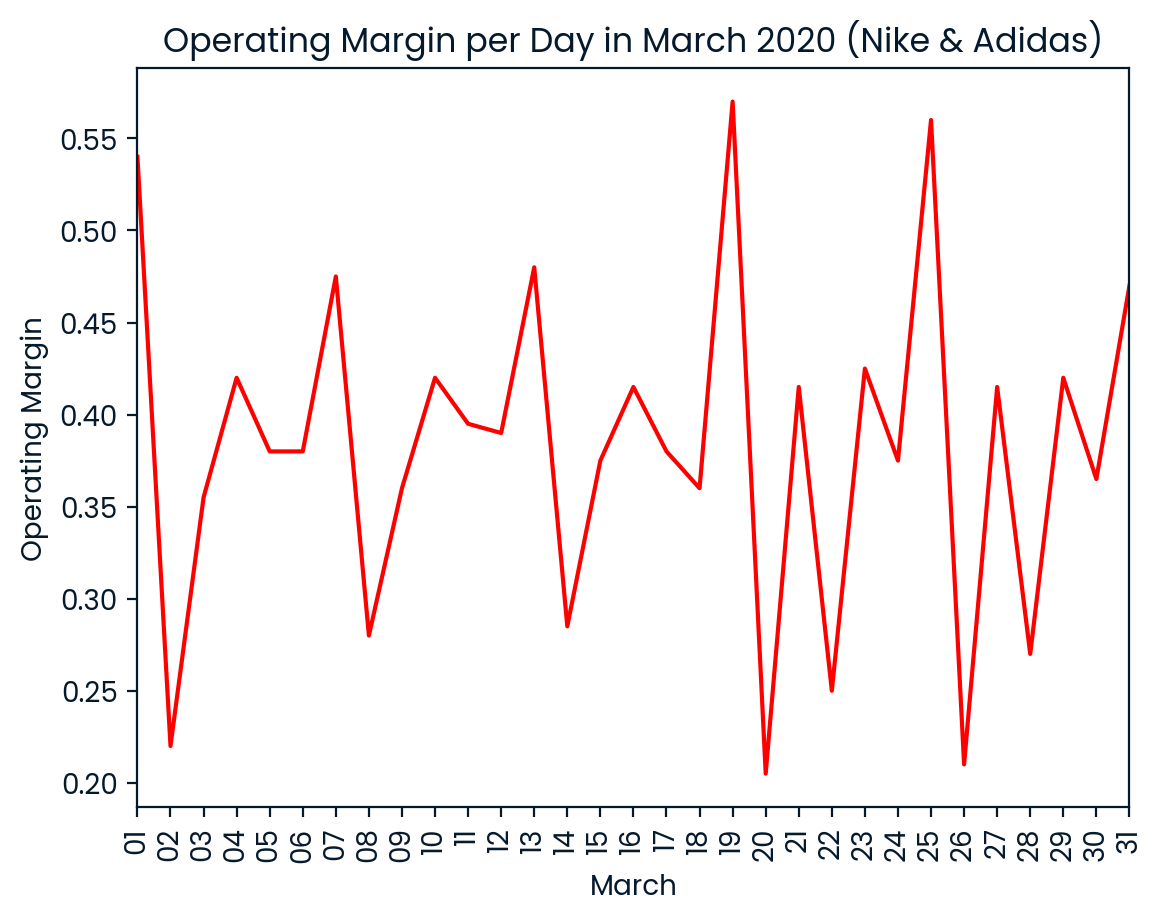

In [27]:
# plt.plot(nike_mar_2020['Invoice Date'], nike_mar_2020['Operating Margin'], label='Nike', color='blue') 
plt.plot(adidas_mar_2020['Invoice Date'], adidas_mar_2020['Operating Margin'], label='Adidas', color='red')
plt.xlabel('March')
plt.ylabel('Operating Margin')
plt.title('Operating Margin per Day in March 2020 (Nike & Adidas)')
# plt.legend()
plt.xticks(rotation = 90)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().set_xlim([pd.Timestamp('2020-03-01'), pd.Timestamp('2020-03-31')])
plt.show()


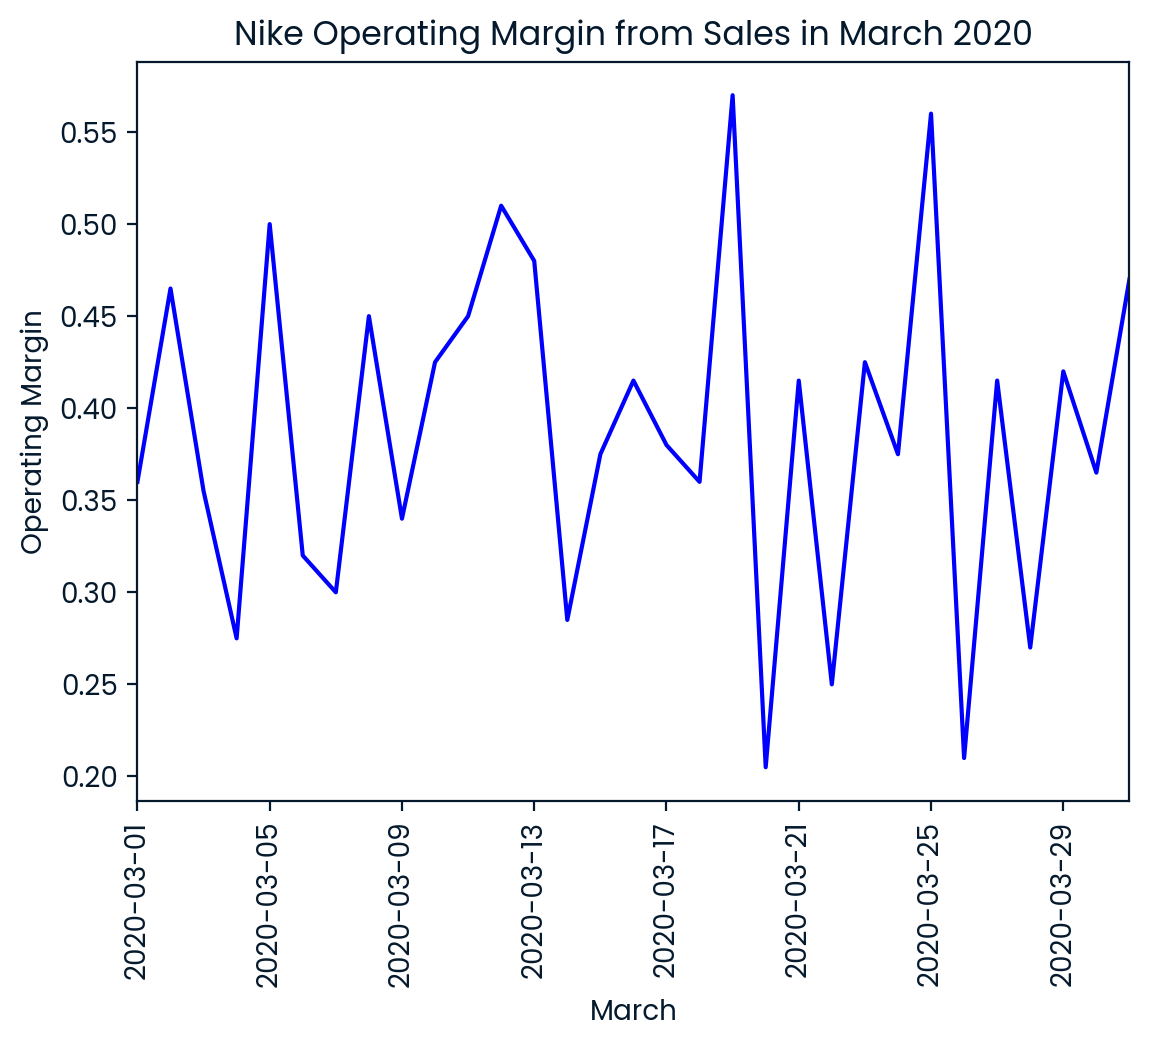

In [28]:
plt.plot(nike_mar_2020['Invoice Date'], nike_mar_2020['Operating Margin'], label='Nike', color='blue') 
plt.xticks(rotation = 90)
plt.xlabel('March')
plt.title('Nike Operating Margin from Sales in March 2020')
plt.ylabel('Operating Margin')
plt.gca().set_xlim([pd.Timestamp('2020-03-01'), pd.Timestamp('2020-03-31')])
plt.show()


In [29]:
adidas_mar_2021 = adidas_daily[(adidas_daily['Invoice Date'] >= '2021-03-01') & (adidas_daily['Invoice Date'] < '2021-04-01')]
# adidas_mar_2020.sort_values(by='Invoice Date')

nike_mar_2021 = nike_daily[(nike_daily['Invoice Date'] >= '2021-03-01') & (nike_daily['Invoice Date'] < '2021-04-01')]

adidas_mar_2021



,Invoice Date,Units Sold,Operating Profit,Operating Margin
418,2021-03-01,544,70553,0.475
419,2021-03-02,6972,671621,0.445
420,2021-03-03,2996,296386,0.395
421,2021-03-04,871,141188,0.505
422,2021-03-05,8150,790024,0.410
423,2021-03-06,8290,782403,0.450
424,2021-03-07,618,88636,0.455
425,2021-03-08,6682,880864,0.420
426,2021-03-09,9921,986872,0.400
427,2021-03-10,12444,1217449,0.440
